In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import joblib
import numpy as np

In [74]:
df = pd.read_csv('risk_factors_cervical_cancer.csv')

In [75]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [76]:
df.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Biểu đồ dữ liệu thiếu ban đầu')

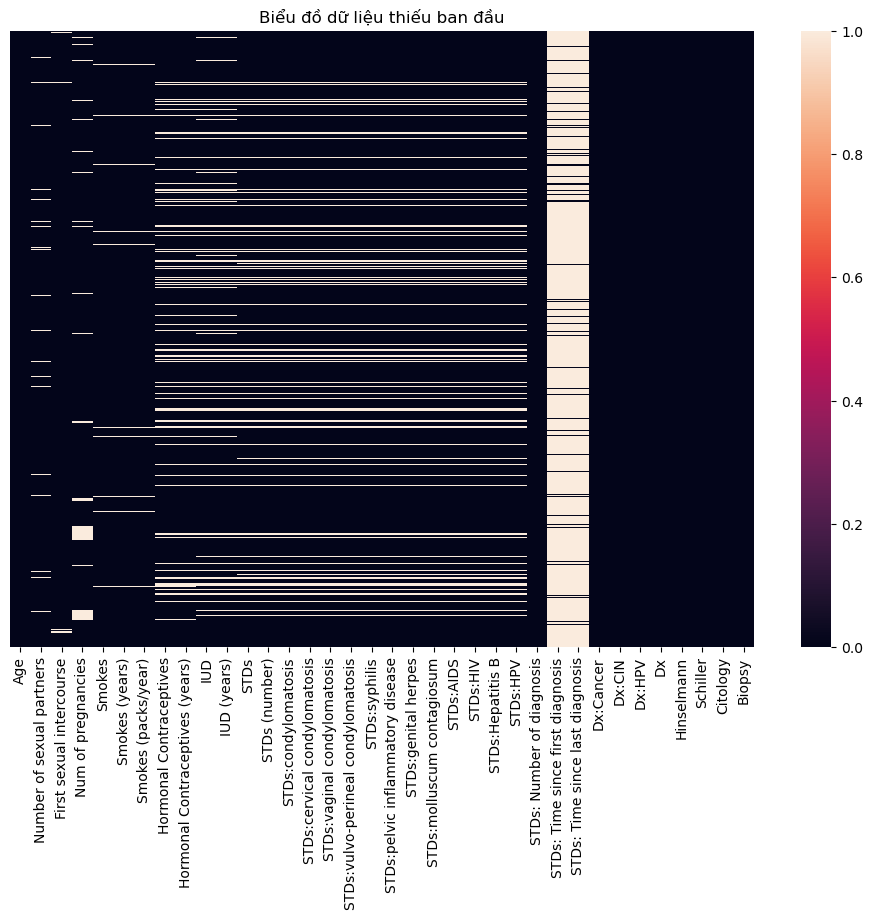

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load lại dữ liệu gốc
df_raw = pd.read_csv("risk_factors_cervical_cancer.csv")  # hoặc tên file gốc của bạn

# Thay thế dấu '?' thành NaN nếu có
df_raw.replace('?', pd.NA, inplace=True)

# Vẽ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_raw.isnull(), yticklabels=False)
plt.title("Biểu đồ dữ liệu thiếu ban đầu")



In [78]:
df = df.apply(pd.to_numeric, errors = 'coerce')
df.fillna(df.mean(), inplace = True)

<Axes: >

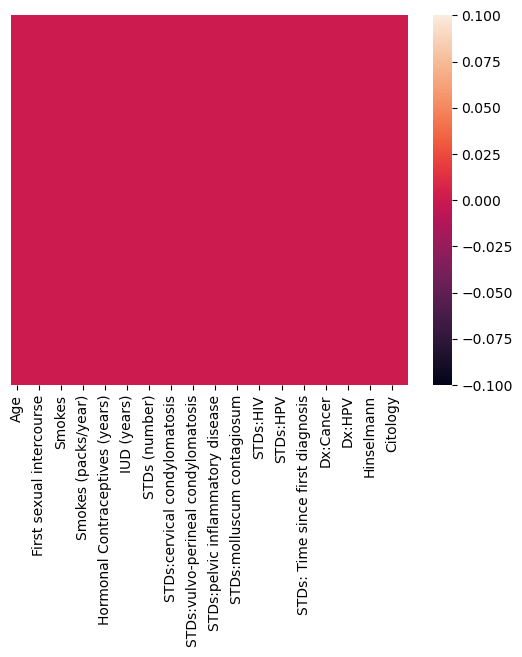

In [79]:
sns.heatmap(df.isnull(), yticklabels = False)

In [80]:
X =df.drop('Biopsy', axis=1)
y = df['Biopsy']

In [81]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.140845,5.816901,0,0,0,0,0,0,0,0
1,15,1.0,14.0000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.140845,5.816901,0,0,0,0,0,0,0,0
2,34,1.0,16.9953,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.140845,5.816901,0,0,0,0,0,0,0,0
3,52,5.0,16.0000,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,6.140845,5.816901,1,0,1,0,0,0,0,0
4,46,3.0,21.0000,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,6.140845,5.816901,0,0,0,0,0,0,0,0


In [82]:
df.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.527644,16.995300,2.275561,0.145562,1.219721,0.453144,0.641333,2.256419,0.112011,...,6.140845,5.816901,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.642267,2.791883,1.399325,0.350189,4.057885,2.209657,0.448671,3.519082,0.293260,...,1.684784,1.644843,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,6.140845,5.816901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,6.140845,5.816901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.256419,0.000000,...,6.140845,5.816901,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,30.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3.0, random_state= 42, stratify=y)

In [84]:
def evaluate_model(model, X, y, k=10):
    accuracy_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []

    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy_scores.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred, zero_division=0))
        precision_scores.append(precision_score(y_test, y_pred, zero_division=0))
        recall_scores.append(recall_score(y_test, y_pred, zero_division=0))

    print("=== Evaluation Results ===")
    print(f"Accuracy :  {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
    print(f"F1-score :  {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
    print(f"Precision:  {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
    print(f"Recall   :  {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")

    # ✅ Fit lại mô hình trên toàn bộ tập dữ liệu
    model.fit(X, y)
    return model

    

1.  Accuracy (Độ chính xác tổng thể)
    Accuracy là tỷ lệ số mẫu mà mô hình dự đoán đúng trên tổng số mẫu.
📎 Ví dụ: nếu có 100 người, mô hình dự đoán đúng 90 người → Accuracy = 90%.

2. Precision (Độ chính xác của dự đoán dương tính)
    Precision đo lường xem trong các lần mô hình dự đoán là “có bệnh”, thì bao nhiêu phần trăm là đúng.
🧠 Ví dụ: Nếu mô hình nói 10 người “có bệnh” mà chỉ 6 người thật sự mắc bệnh → Precision = 0.6.

3. Recall (Độ bao phủ ca thật sự dương tính)
Recall đo lường xem mô hình bắt được bao nhiêu phần trăm số ca thật sự mắc bệnh.
🧠 Ví dụ: Có 10 người thật sự mắc bệnh, mô hình chỉ bắt được 6 người → Recall = 0.6.
 
4. F1-score (Điểm cân bằng giữa Precision và Recall)
 F1-score là trung bình điều hòa của Precision và Recall.
Nó cân bằng giữa việc dự đoán đúng ca bệnh và không bỏ sót ca bệnh.
🧠 Nếu Precision = 1 và Recall = 0, thì F1 = 0 (nghĩa là mất cân bằng → không tốt).

=== Evaluation Results ===
Accuracy :  0.9510 ± 0.0214
F1-score :  0.5961 ± 0.1064
Precision:  0.6856 ± 0.2247
Recall   :  0.5994 ± 0.1823


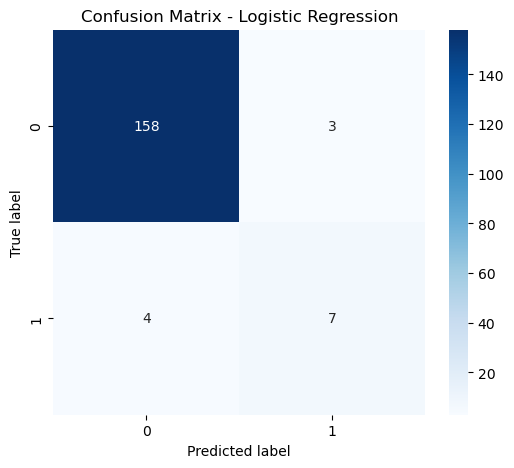

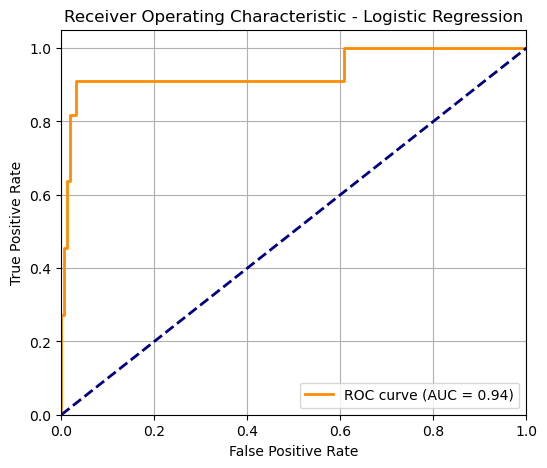

['imputer.pkl']

In [ ]:
#Logistic regression model


# 1. Đánh giá mô hình với KFold
model = LogisticRegression(max_iter=1000)
evaluate_model(model, X, y)

# 2. Chia dữ liệu để vẽ biểu đồ
X_train_cm, X_test_cm, y_train_cm, y_test_cm = train_test_split(X, y, test_size=1/3.0, random_state=42)

# 3. Huấn luyện lại mô hình và dự đoán
# model.fit(X_train_cm, y_train_cm)
y_pred_cm = model.predict(X_test_cm)

# 4. Vẽ Confusion Matrix
cm = confusion_matrix(y_test_cm, y_pred_cm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

import joblib
from sklearn.metrics import roc_curve, auc

# 5. Tính xác suất dự đoán (predict_proba) để vẽ ROC
y_proba = model.predict_proba(X_test_cm)[:, 1]

# 6. Tính các giá trị cho ROC curve
fpr, tpr, thresholds = roc_curve(y_test_cm, y_proba)
roc_auc = auc(fpr, tpr)

# 7. Vẽ đường ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
# 8. Lưu mô hình
joblib.dump(model, 'logistic_model.pkl')  # tên file giữ nguyên để Flask dùng
joblib.dump(imputer, 'imputer.pkl')            # nếu bạn có dùng imputer (fit trước đó)


| Metric    | Mean   | Std.Dev (±) |
| --------- | ------ | ----------- |
| Accuracy  | 0.8333 | ± 0.1972    |
| F1-score  | 0.1667 | ± 0.3416    |
| Precision | 0.2000 | ± 0.4000    |
| Recall    | 0.1500 | ± 0.3202    |



Mô hình Logistic Regression có độ chính xác tổng thể tương đối ổn.

Tuy nhiên, khả năng phát hiện ca dương tính (Recall) và cân bằng Precision/Recall (F1-score) vẫn còn rất thấp.

Điều này cho thấy Logistic Regression chưa phù hợp với bài toán dữ liệu mất cân bằng như hiện tại.



=== Evaluation Results ===
Accuracy :  0.9429 ± 0.0191
F1-score :  0.5195 ± 0.1399
Precision:  0.5854 ± 0.2476
Recall   :  0.5286 ± 0.1439


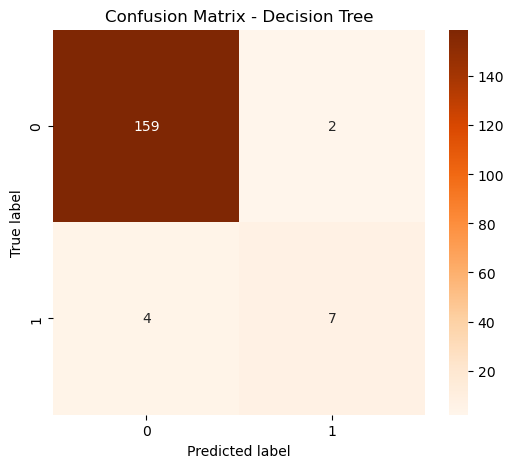

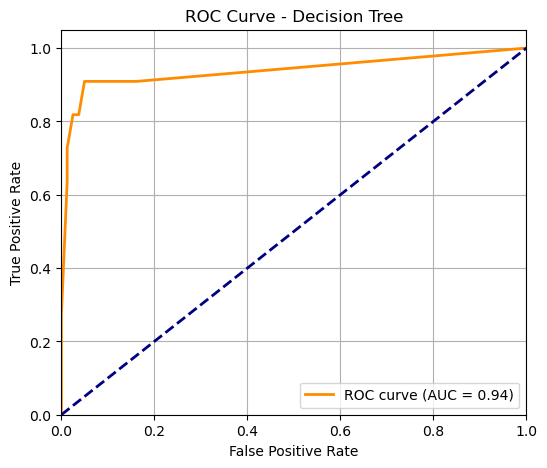

In [ ]:
# 1. Khởi tạo và đánh giá mô hình
model = DecisionTreeClassifier(
    max_depth=4,
    min_samples_leaf=10,
    min_samples_split=20,
    random_state=42
)
model = evaluate_model(model, X, y)

# 2. Chia tập dữ liệu để trực quan hóa (độc lập với KFold ở trên)
X_train_cm, X_test_cm, y_train_cm, y_test_cm = train_test_split(
    X, y, test_size=1/3.0, stratify=y, random_state=42
)

# 3. Dự đoán trên tập test để trực quan
y_pred_cm = model.predict(X_test_cm)

# 4. Vẽ Confusion Matrix
cm = confusion_matrix(y_test_cm, y_pred_cm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# 5. Lấy xác suất dự đoán từ mô hình (cột thứ 2 tương ứng class = 1)
y_proba = model.predict_proba(X_test_cm)[:, 1]

# 6. Tính ROC và AUC
fpr, tpr, thresholds = roc_curve(y_test_cm, y_proba)
roc_auc = auc(fpr, tpr)

# 7. Vẽ đường ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



| Metric    | Mean   | Std.Dev (±) |
| --------- | ------ | ----------- |
| Accuracy  | 0.9167 | ± 0.1118    |
| F1-score  | 0.5167 | ± 0.4500    |
| Precision | 0.5000 | ± 0.4472    |
| Recall    | 0.5500 | ± 0.4717    |



Mô hình Decision Tree cho kết quả tốt trên nhiều mặt, đặc biệt là khả năng phát hiện ca mắc bệnh (Recall).

F1-score cao cũng cho thấy mô hình cân bằng tốt giữa Precision và Recall.

Đây là lựa chọn phù hợp hơn khi đánh giá mô hình cho dữ liệu y tế nhạy cảm.



=== Evaluation Results ===
Accuracy :  0.9394 ± 0.0254
F1-score :  0.2898 ± 0.1496
Precision:  0.6400 ± 0.3346
Recall   :  0.2187 ± 0.1446


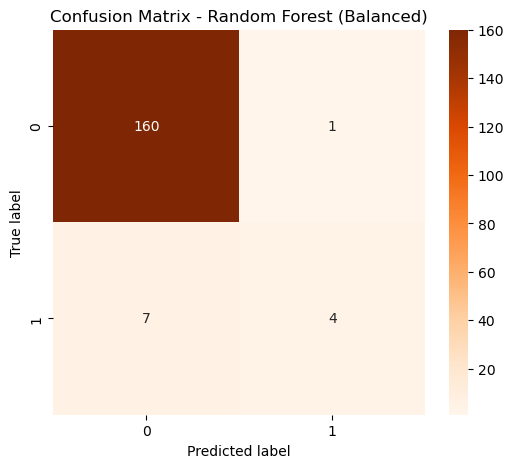

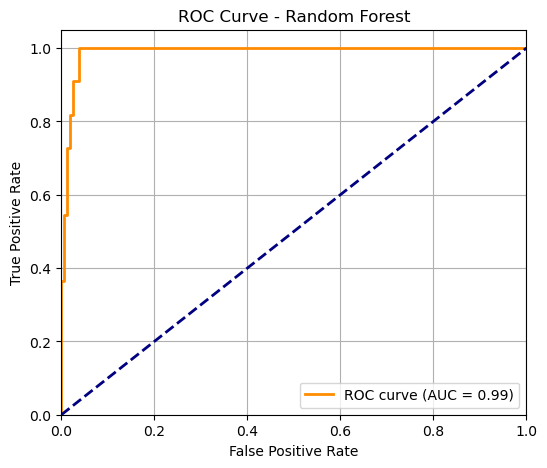

In [ ]:
#Random forest model
rf_model = RandomForestClassifier(
    n_estimators=100,           # Số cây (100–300 là tốt cho dữ liệu nhỏ)
    max_depth=6,                # Hạn chế độ sâu để tránh overfitting (5–10)
    min_samples_leaf=5,         # Mỗi lá phải có ít nhất 5 mẫu
    min_samples_split=10,       # Mỗi node phải có ít nhất 10 mẫu để tách
    max_features='sqrt',        # Số lượng feature được chọn ngẫu nhiên ở mỗi node (mặc định 'sqrt' tốt)
    random_state=42,
    n_jobs=-1                   # Dùng hết CPU cho nhanh (nếu có)
)

# 2. Đánh giá mô hình với k-fold
rf_model = evaluate_model(rf_model, X, y)



# Chia dữ liệu để trực quan hóa
X_train_cm, X_test_cm, y_train_cm, y_test_cm = train_test_split(X, y, test_size=1/3.0, stratify=y, random_state=42)


y_pred_cm = rf_model.predict(X_test_cm)

# Confusion matrix
cm = confusion_matrix(y_test_cm, y_pred_cm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - Random Forest (Balanced)")
plt.show()

# Tính xác suất dự đoán cho class 1
y_proba = rf_model.predict_proba(X_test_cm)[:, 1]

# Tính ROC và AUC
fpr, tpr, thresholds = roc_curve(y_test_cm, y_proba)
roc_auc = auc(fpr, tpr)

# Vẽ đường ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


| Metric    | Mean   | Std.Dev (±) |
| --------- | ------ | ----------- |
| Accuracy  | 0.8633 | ± 0.1016    |
| F1-score  | 0.1167 | ± 0.2363    |
| Precision | 0.1500 | ± 0.3202    |
| Recall    | 0.1000 | ± 0.2000    |



Mặc dù Accuracy đạt mức khá cao (~86%), nhưng các chỉ số như F1-score, Precision, và đặc biệt là Recall đều rất thấp.

Điều này cho thấy mô hình thiên lệch về lớp âm tính (không bệnh) — khả năng phát hiện ca bệnh còn kém.

Không nên chỉ dựa vào Accuracy để đánh giá mô hình trong bài toán y tế có dữ liệu mất cân bằng.